In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.91222318500654 56.83919469067439
55.26671630099597 176.60127898706594
-60.870033366501275 -128.36679414986358
76.64637068259847 40.16114692259811
80.1824474822593 120.35663523596423
-82.0281834825583 -100.99550230419138
29.780844107161116 89.85479033210038
-62.10822263997443 -72.15463569222173
3.5674497282209927 81.81064362787663
-27.840554229833756 -85.8247917751712
-84.33928700560097 21.243658379203822
83.21555726596097 -64.3523549282081
35.45242846800504 134.58964932049122
-17.661762155524386 53.284250364399924
79.80006105698303 25.389024589285157
-73.34678401392759 160.87009495270706
69.16137554534163 59.34788671204532
-86.24366249122255 -77.73735650271051
56.65581578937014 -176.2862631985759
-73.84190657567896 124.97182671091963
-72.98334672490277 3.5898330633772844
-36.5963315925472 -37.56770361672196
-86.22187591530052 -94.32101639002886
-24.930663152645607 -75.08466996935095
-52.86535841011283 -15.596569753906778
14.510268715671629 -76.73988765982757
41.80622677083474 46.28

57.578586053562276 164.49291373967378
65.01792685480584 154.02233553325487
37.23594761206449 12.810723102862056
71.3710101924473 98.52112347150643
-83.43566916597399 -28.87533596932309
72.359453556803 132.3477409836405
4.730655529058453 -16.059164019910384
-14.82692478078421 -61.75286693942404
34.09480037658017 51.634964322883036
-69.85796798640911 -75.78837772206408
-15.780239357103298 -142.00557848745427
-82.61940577959139 164.68520775675387
85.0158266844137 60.722400023451485
52.20365655506785 32.45844107389894
36.48079103256575 30.65626839253511
-52.65909579465254 -125.86009828792668
-41.35930786112053 -9.7087628516893
-60.168693626923925 -13.428859070762996
11.352462044507305 130.4233035518772
-37.72818876022987 -89.87454092206676
43.91376719316594 -36.32777065681756
-73.16198138446133 -35.805188826038034
50.41625041420966 163.80128712069597


In [13]:
#Import requests library

import requests

#Import API Key

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
#Starting URL for Weather Map API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49a89315954c35219f8ffe8210446ef3


In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | lasa
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hambantota
Processing Record 10 of Set 1 | coquimbo
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | toyooka
Processing Record 14 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 15 of Set 1 | havoysund
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | laguna
Processing Reco

Processing Record 38 of Set 4 | fort nelson
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 4 | dakar
Processing Record 41 of Set 4 | santiago
Processing Record 42 of Set 4 | ahipara
Processing Record 43 of Set 4 | dubbo
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | namibe
Processing Record 46 of Set 4 | moba
Processing Record 47 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 48 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 49 of Set 4 | armacao dos buzios
City not found. Skipping...
Processing Record 50 of Set 4 | poddorye
Processing Record 1 of Set 5 | bubaque
Processing Record 2 of Set 5 | tevaitoa
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | marmande
Processing Record 5 of Set 5 | pamyat parizhskoy kommuny
Processing Record 6 of Set 5 | arlit
Processing Record 7 of Set 5 | ipojuca
Processing Record 8 of Set 5 | baykit
Processing Record 

Processing Record 26 of Set 8 | lagoa
Processing Record 27 of Set 8 | panjab
Processing Record 28 of Set 8 | port hedland
Processing Record 29 of Set 8 | lakes entrance
Processing Record 30 of Set 8 | paoua
Processing Record 31 of Set 8 | cernesti
Processing Record 32 of Set 8 | ciras
City not found. Skipping...
Processing Record 33 of Set 8 | otane
Processing Record 34 of Set 8 | ketchikan
Processing Record 35 of Set 8 | balabac
Processing Record 36 of Set 8 | ayios matthaios
City not found. Skipping...
Processing Record 37 of Set 8 | kingman
Processing Record 38 of Set 8 | kupang
Processing Record 39 of Set 8 | andenes
Processing Record 40 of Set 8 | santa branca
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | marsa matruh
Processing Record 43 of Set 8 | drochia
Processing Record 44 of Set 8 | wanlaweyn
Processing Record 45 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 46 of Set 8 | dhone
Processing Record 47 of Set 8 | rincon
P

Processing Record 13 of Set 12 | weihe
Processing Record 14 of Set 12 | vestmannaeyjar
Processing Record 15 of Set 12 | lashio
Processing Record 16 of Set 12 | erenhot
Processing Record 17 of Set 12 | ocampo
Processing Record 18 of Set 12 | eganville
Processing Record 19 of Set 12 | coffs harbour
Processing Record 20 of Set 12 | lloydminster
Processing Record 21 of Set 12 | torres
Processing Record 22 of Set 12 | trincomalee
Processing Record 23 of Set 12 | potosi
Processing Record 24 of Set 12 | takoradi
Processing Record 25 of Set 12 | maghama
City not found. Skipping...
Processing Record 26 of Set 12 | show low
Processing Record 27 of Set 12 | bafq
Processing Record 28 of Set 12 | aykino
Processing Record 29 of Set 12 | nuuk
Processing Record 30 of Set 12 | kazlu ruda
Processing Record 31 of Set 12 | chama
Processing Record 32 of Set 12 | otjiwarongo
Processing Record 33 of Set 12 | stephenville
Processing Record 34 of Set 12 | chapais
Processing Record 35 of Set 12 | kuching
Proces

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,71.19,85,86,14.74,RE,2022-06-12 17:17:32
1,Beringovskiy,63.0500,179.3167,38.68,62,25,3.11,RU,2022-06-12 17:17:32
2,Rikitea,-23.1203,-134.9692,72.84,65,87,7.31,PF,2022-06-12 17:17:33
3,Ostrovnoy,68.0531,39.5131,60.62,70,86,20.45,RU,2022-06-12 17:17:33
4,Saskylakh,71.9167,114.0833,58.98,48,59,5.53,RU,2022-06-12 17:17:33
5,Punta Arenas,-53.1500,-70.9167,53.71,66,20,11.50,CL,2022-06-12 17:13:31
6,Lasa,46.6166,10.7002,81.48,37,11,3.42,IT,2022-06-12 17:17:34
7,Ushuaia,-54.8000,-68.3000,46.06,81,75,11.50,AR,2022-06-12 17:17:21
8,Hambantota,6.1241,81.1185,81.09,80,75,17.69,LK,2022-06-12 17:17:34
9,Coquimbo,-29.9533,-71.3436,55.13,71,0,8.05,CL,2022-06-12 17:17:35


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

df = city_data_df[new_column_order]

df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-06-12 17:17:32,-21.3585,55.7679,71.19,85,86,14.74
1,Beringovskiy,RU,2022-06-12 17:17:32,63.0500,179.3167,38.68,62,25,3.11
2,Rikitea,PF,2022-06-12 17:17:33,-23.1203,-134.9692,72.84,65,87,7.31
3,Ostrovnoy,RU,2022-06-12 17:17:33,68.0531,39.5131,60.62,70,86,20.45
4,Saskylakh,RU,2022-06-12 17:17:33,71.9167,114.0833,58.98,48,59,5.53
5,Punta Arenas,CL,2022-06-12 17:13:31,-53.1500,-70.9167,53.71,66,20,11.50
6,Lasa,IT,2022-06-12 17:17:34,46.6166,10.7002,81.48,37,11,3.42
7,Ushuaia,AR,2022-06-12 17:17:21,-54.8000,-68.3000,46.06,81,75,11.50
8,Hambantota,LK,2022-06-12 17:17:34,6.1241,81.1185,81.09,80,75,17.69
9,Coquimbo,CL,2022-06-12 17:17:35,-29.9533,-71.3436,55.13,71,0,8.05


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

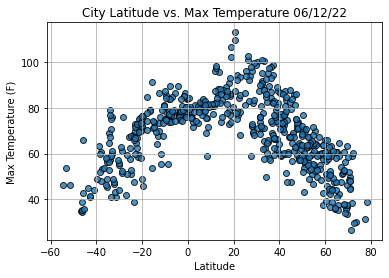

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

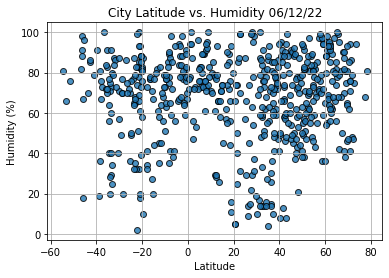

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

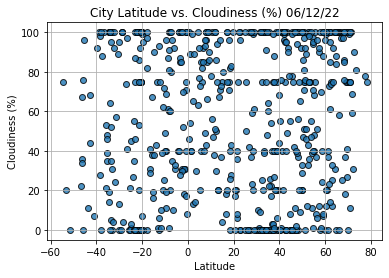

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()